In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import networkx as nx
from utils import *
from dataStruct import *
from graphTheory import *

In [107]:
SimulationOptions = simulation_options__(dt = 1e-3, T = 3,
                                        interfaceContactWires = [73, 30])

Connectivity = connectivity__(
    filename = '2016-09-08-155153_asn_nw_00100_nj_00261_seed_042_avl_100.00_disp_10.00.mat')

JunctionState = junctionState__(Connectivity.numOfJunctions)
Stimulus = stimulus__(biasType = 'DC', 
                    TimeVector = SimulationOptions.TimeVector, 
                    onTime = 0, offTime = 1,
                    onAmp = 0.1, offAmp = 0.005)

Equations = equations__(Connectivity, SimulationOptions.contactWires)
network1 = simulateNetwork(SimulationOptions, Connectivity, JunctionState, 
                                    Stimulus, Equations, 
                                    simpleOutput=False,
                                    useSparse=False)

# this_realization.allocateData()
# this_realization.draw(time = 0.9, JunctionsToObserve =[4, 229])

Running Simulation : 100%|████████████████████████████████████████████████████████| 3000/3000 [00:10<00:00, 274.57it/s]


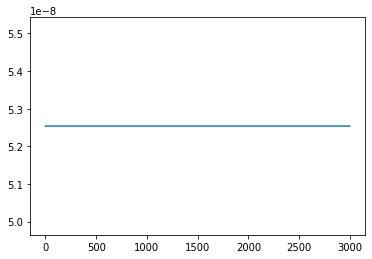

In [109]:
plt.plot(1/network1.networkResistance)

In [106]:
network1.draw(time = 0.928)

In [94]:
currentPaths, formedTime = findCurrent(network1, numToFind = 4)

In [110]:
currentPaths

[[73, 66, 71, 64, 26, 6, 69, 1, 53, 30],
 [73, 66, 71, 65, 29, 38, 21, 13, 2, 25, 30],
 [73, 66, 71, 76, 14, 38, 21, 13, 2, 25, 30],
 [73, 66, 71, 65, 29, 3, 48, 12, 2, 25, 30],
 [73, 66, 71, 65, 29, 3, 48, 13, 2, 25, 30],
 [73, 66, 71, 65, 29, 38, 21, 13, 48, 12, 2, 25, 30],
 [73, 66, 71, 76, 14, 38, 21, 13, 48, 12, 2, 25, 30],
 [73, 66, 71, 76, 14, 38, 29, 3, 48, 12, 2, 25, 30],
 [73, 66, 71, 76, 14, 38, 29, 3, 48, 13, 2, 25, 30]]

In [105]:
formedTime

[0.802, 0.926, 0.926, 0.928, 0.928, 0.928, 0.928, 0.928, 0.928]

In [86]:
first50, length50 = k_shortest_paths(network1, k = 50, getLength = True)

In [111]:
first50

[[73, 66, 71, 64, 26, 6, 69, 1, 53, 30],
 [73, 68, 66, 71, 64, 26, 6, 69, 1, 53, 30],
 [73, 66, 71, 65, 29, 3, 48, 12, 2, 25, 30],
 [73, 66, 71, 64, 29, 3, 48, 12, 2, 25, 30],
 [73, 66, 71, 64, 26, 33, 6, 69, 1, 53, 30],
 [73, 66, 71, 64, 26, 6, 36, 16, 1, 53, 30],
 [73, 66, 71, 64, 26, 6, 69, 1, 18, 53, 30],
 [73, 66, 71, 64, 26, 6, 69, 1, 53, 25, 30],
 [73, 95, 66, 71, 64, 26, 6, 69, 1, 53, 30],
 [73, 66, 71, 76, 14, 38, 21, 13, 2, 25, 30],
 [73, 66, 71, 65, 64, 26, 6, 69, 1, 53, 30],
 [73, 66, 71, 65, 29, 38, 21, 13, 2, 25, 30],
 [73, 66, 71, 65, 29, 3, 48, 13, 2, 25, 30],
 [73, 66, 71, 65, 29, 3, 48, 12, 1, 53, 30],
 [73, 66, 71, 64, 29, 38, 21, 13, 2, 25, 30],
 [73, 66, 71, 64, 29, 3, 48, 13, 2, 25, 30],
 [73, 66, 71, 64, 29, 3, 48, 12, 1, 53, 30],
 [73, 66, 71, 64, 26, 89, 6, 69, 1, 53, 30],
 [73, 66, 71, 64, 26, 33, 93, 12, 2, 25, 30],
 [73, 66, 71, 64, 26, 6, 51, 69, 1, 53, 30],
 [73, 66, 71, 64, 26, 6, 36, 70, 1, 53, 30],
 [73, 66, 71, 64, 26, 6, 36, 16, 18, 53, 30],
 [73, 66,

In [11]:
G = nx.from_numpy_array(network1.adjMat)

In [30]:
c = nx.communicability_exp(G)

In [34]:
centrality = np.zeros(100)
comm = np.zeros(100)

In [48]:
for i in range(100):
    centrality[i] = c[i][i]
    for j in range(100):
        comm[i] += c[i][j]

In [103]:
sumcomm = 0
for i in currentPaths[]:
    sumcomm += comm[i-1]
print(sumcomm)

3236.601989751824


In [89]:
sumcomm = 0
for i in first50[11]:
    sumcomm += comm[i-1]
print(sumcomm)

4259.677911341245


In [72]:
samelength = 0
for i in length50:
    if i == 10:
        samelength+=1
print(samelength)

40


In [75]:
theircomm = []

In [76]:
for j in range(len(length50)):
    if length50[j] == 10:
        temp = 0
        for i in first50[j]:
            temp += comm[i-1]
        theircomm.append([temp])

In [82]:
np.argmax(theircomm)

13

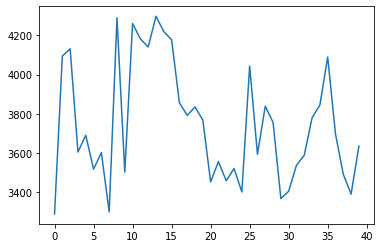

In [90]:
plt.plot(theircomm)

In [45]:
G = nx.from_numpy_array(this_realization.adjMat)

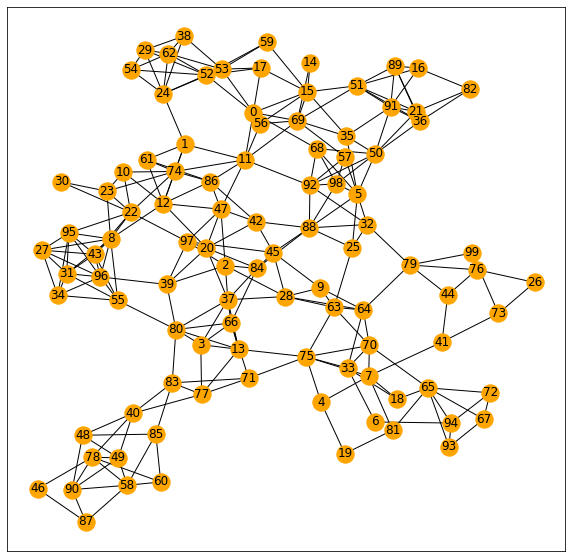

In [46]:
plt.figure(figsize = (10,10))
nx.draw_networkx(G, pos=nx.kamada_kawai_layout(G), fontsize=5, node_color='orange')

In [49]:
currentPaths

[[73, 66, 71, 64, 26, 6, 69, 1, 53, 30],
 [73, 66, 71, 76, 14, 38, 21, 13, 2, 25, 30]]

In [51]:
[i for i in nx.all_simple_paths(onGraph, 72, 29)]

[[72, 65, 70, 63, 25, 5, 68, 0, 52, 29],
 [72, 65, 70, 75, 13, 37, 20, 12, 1, 24, 29]]

In [57]:
ppp = [i for i in nx.connected_component_subgraphs(onGraph)]

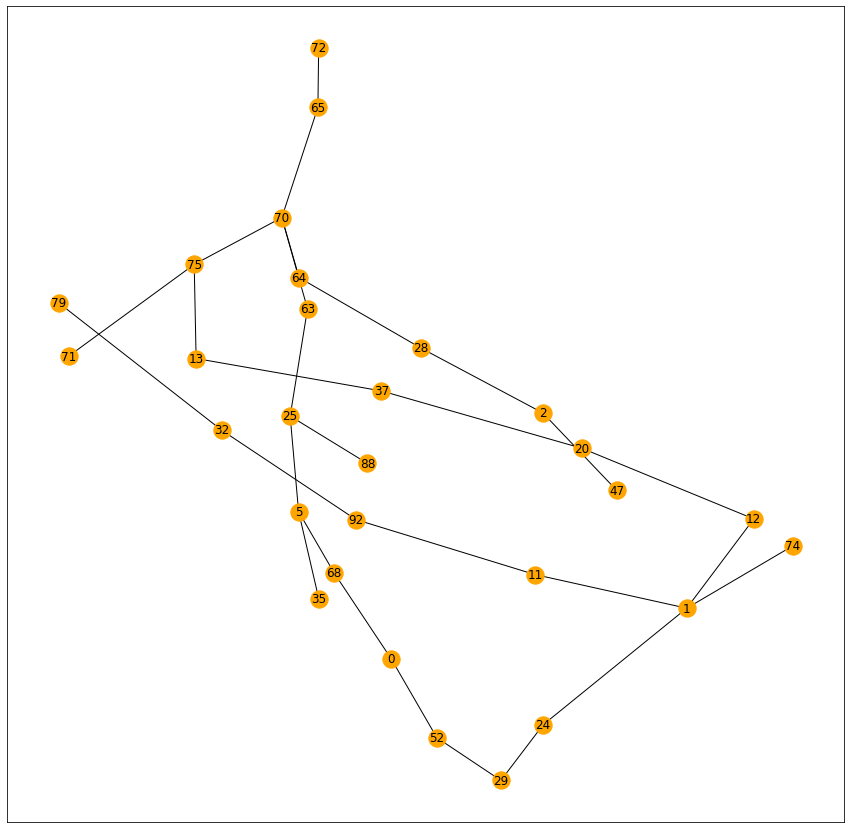

In [62]:
plt.figure(figsize = (15,15))
nx.draw_networkx(ppp[0],pos=nx.spring_layout(G),fontsize=5, node_color='orange')

In [61]:
ppp[0].edges

EdgeView([(0, 52), (0, 68), (1, 11), (1, 12), (1, 24), (1, 74), (2, 28), (2, 47), (5, 25), (5, 35), (5, 68), (11, 92), (12, 20), (13, 37), (13, 75), (20, 37), (24, 29), (25, 63), (25, 88), (28, 64), (29, 52), (32, 79), (32, 92), (63, 70), (64, 70), (65, 70), (65, 72), (70, 75), (71, 75)])